In [5]:
import pandas as pd
import pathlib
import os
import numpy as np

Importando os arquivos

In [6]:
data_dir = pathlib.Path('data')
data = {}
for file_name in os.listdir(data_dir):
    city_name = file_name[8:].split('.')[0]
    data[city_name] = pd.read_csv(os.path.join(data_dir,file_name))

print(data["salvador"][:10])

   YEAR     JAN     FEB     MAR     APR     MAY     JUN     JUL     AUG  \
0  1961  999.90  999.90  999.90  999.90  999.90  999.90  999.90  999.90   
1  1962   26.07   25.97   26.07   25.77   24.47   23.37   22.47   22.47   
2  1963  999.90   25.78   26.38   25.68   23.68  999.90   22.08   22.38   
3  1964   25.27   25.67   25.47   24.97   24.07   23.07   22.77   22.77   
4  1965   24.96   25.76   26.06   24.96   24.56   23.56   23.26   22.86   
5  1966   25.85   25.25   25.35   25.25   24.15   23.55   22.75   22.65   
6  1967   26.14   26.14   25.74   25.34   24.34   23.84   22.54   22.54   
7  1968   25.03   25.03   24.83   24.73   23.23   21.73   22.03   21.83   
8  1969   25.53   25.43   25.43   25.23   24.33   23.83   23.43   22.93   
9  1970   25.32   25.82   25.82   24.92   24.22   23.32   22.42   22.42   

      SEP     OCT     NOV    DEC   D-J-F   M-A-M   J-J-A   S-O-N  metANN  
0  999.90  999.90  999.90  24.97  999.90  999.90  999.90  999.90  999.90  
1   23.37   22.97   24.6

Eliminando colunas

In [7]:
print(list(data["salvador"].columns))

for k in data.keys():
    data[k].drop(['D-J-F','M-A-M','J-J-A','S-O-N'], axis=1, inplace=True)

print(list(data["belem"]))

['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN']
['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'metANN']


Verificando os dados de uma das bases

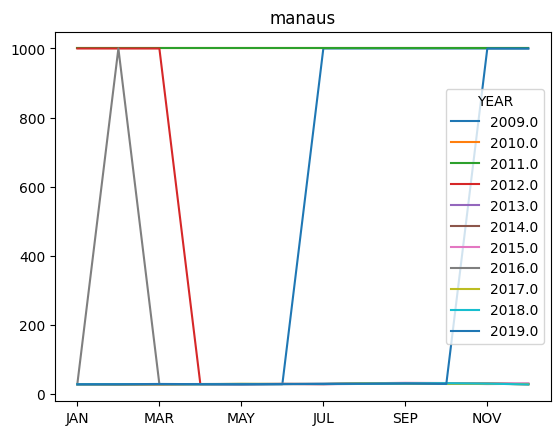

In [8]:
def show_data(city_name):
    df = data[city_name].T
    df.columns = df.iloc[0]
    df.drop(["YEAR"], axis=0, inplace=True)
    df.iloc[:-1,-11:].plot(title=city_name)

show_data("manaus")

Eliminando outliers através do conceito de variação interquartil

In [9]:
def get_limits(column):
    q1 = column.quantile(0.25) # corresponde à 25% dos dados
    q3 = column.quantile(0.75) # corresponde ao restante (75%)
    iqr = q3 - q1
    limits = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return limits

def delete_outliers_per_column(df, column_name):
    rows = df.shape[0]
    lower_lim, upper_lim = get_limits(df[column_name])
    df = df.loc[(df[column_name] >= lower_lim) & (df[column_name] <= upper_lim), :]
    print(column_name)
    deleted_rows = rows - df.shape[0]
    return df, deleted_rows

def delete_outliers(df):
    for month in df.columns[1:13]:
        df, deleted_rows = delete_outliers_per_column(df, month)
        print(f'{deleted_rows} linha(s) removida(s).')
    return df

data["manaus"] = delete_outliers(data["manaus"])

JAN
14 linha(s) removida(s).
FEB
2 linha(s) removida(s).
MAR
0 linha(s) removida(s).
APR
0 linha(s) removida(s).
MAY
0 linha(s) removida(s).
JUN
3 linha(s) removida(s).
JUL
9 linha(s) removida(s).
AUG
3 linha(s) removida(s).
SEP
3 linha(s) removida(s).
OCT
2 linha(s) removida(s).
NOV
1 linha(s) removida(s).
DEC
2 linha(s) removida(s).


Verificando como ficou agora a exibição dos dados

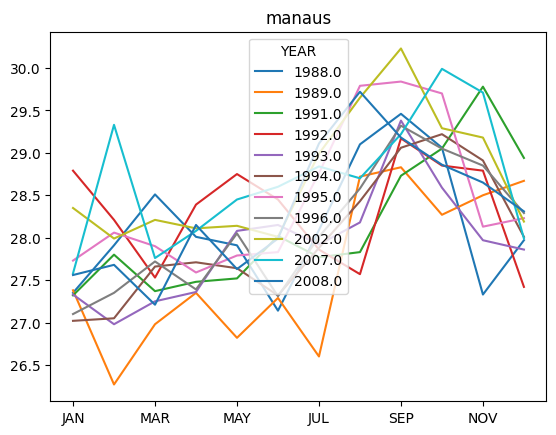

In [10]:
show_data("manaus")

Aplicando para os demais dados

In [11]:
for k in data.keys():
    data[k] = delete_outliers(data[k])

data["belem"].replace(999.90, np.NaN, inplace=True)

JAN
4 linha(s) removida(s).
FEB
1 linha(s) removida(s).
MAR
1 linha(s) removida(s).
APR
1 linha(s) removida(s).
MAY
0 linha(s) removida(s).
JUN
1 linha(s) removida(s).
JUL
6 linha(s) removida(s).
AUG
0 linha(s) removida(s).
SEP
0 linha(s) removida(s).
OCT
0 linha(s) removida(s).
NOV
0 linha(s) removida(s).
DEC
0 linha(s) removida(s).
JAN
0 linha(s) removida(s).
FEB
0 linha(s) removida(s).
MAR
0 linha(s) removida(s).
APR
0 linha(s) removida(s).
MAY
0 linha(s) removida(s).
JUN
0 linha(s) removida(s).
JUL
0 linha(s) removida(s).
AUG
0 linha(s) removida(s).
SEP
0 linha(s) removida(s).
OCT
0 linha(s) removida(s).
NOV
0 linha(s) removida(s).
DEC
0 linha(s) removida(s).
JAN
9 linha(s) removida(s).
FEB
2 linha(s) removida(s).
MAR
2 linha(s) removida(s).
APR
1 linha(s) removida(s).
MAY
0 linha(s) removida(s).
JUN
1 linha(s) removida(s).
JUL
1 linha(s) removida(s).
AUG
0 linha(s) removida(s).
SEP
1 linha(s) removida(s).
OCT
2 linha(s) removida(s).
NOV
1 linha(s) removida(s).
DEC
2 linha(s) remov

Exibindo os gráficos para todas as cidades da base

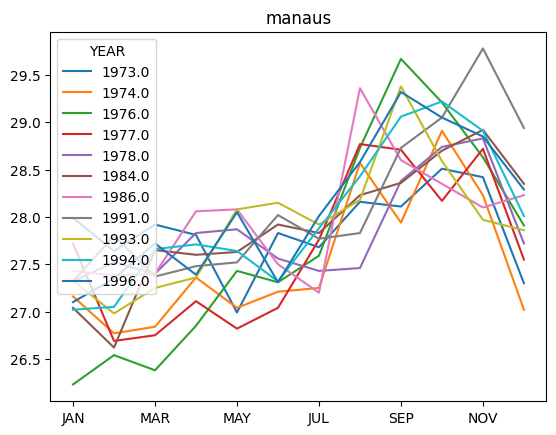

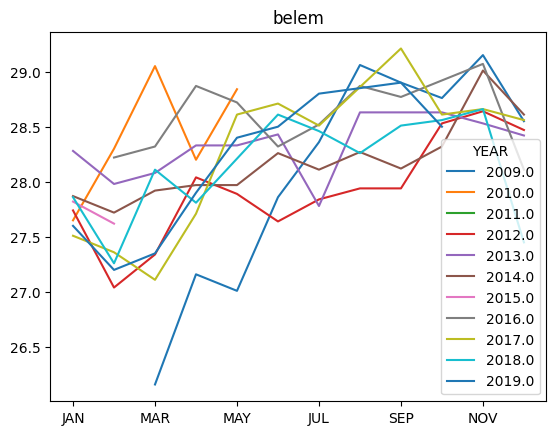

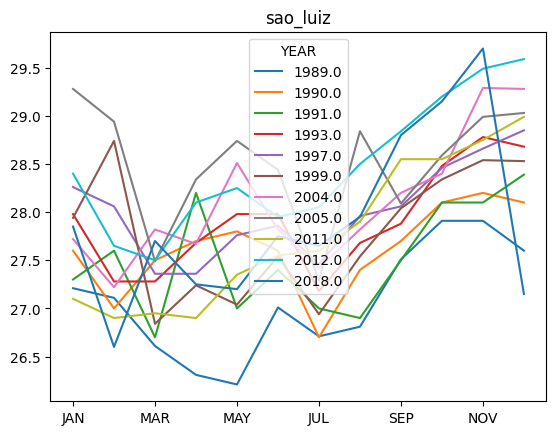

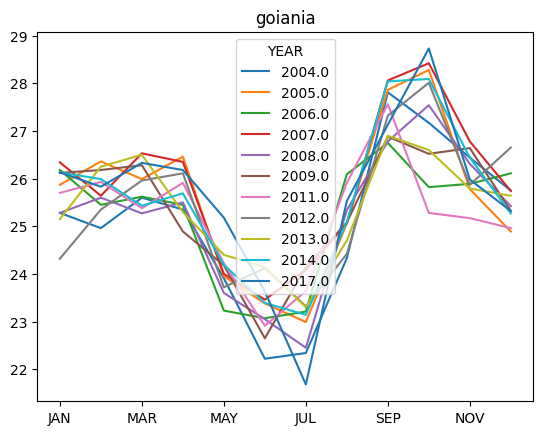

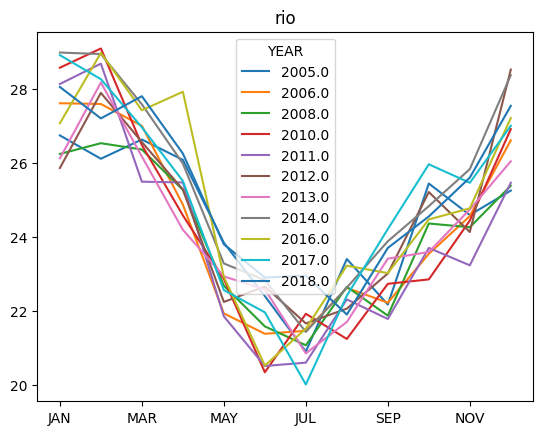

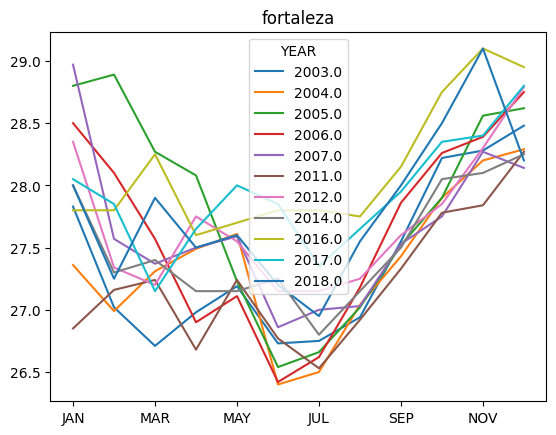

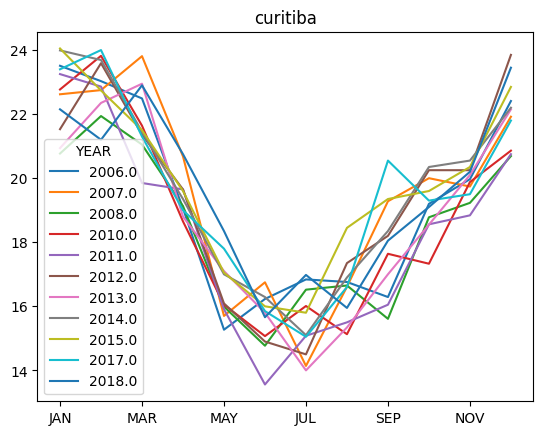

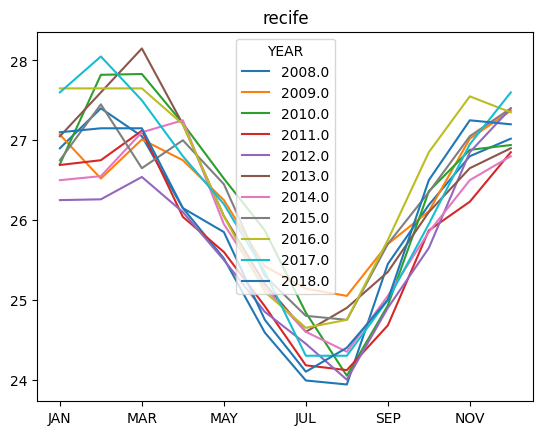

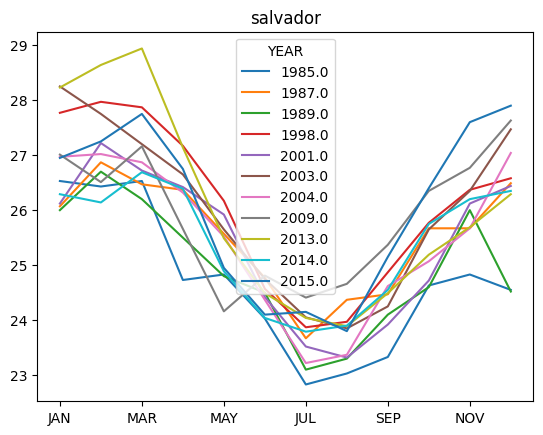

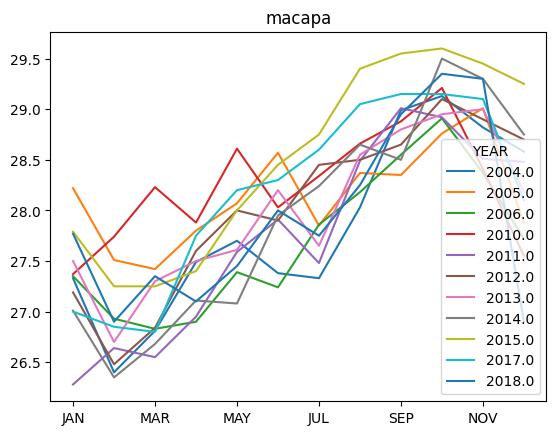

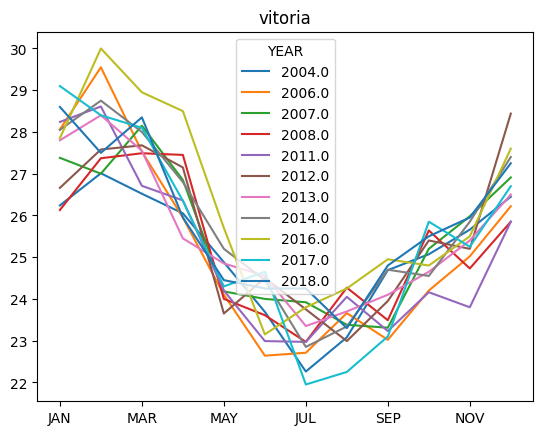

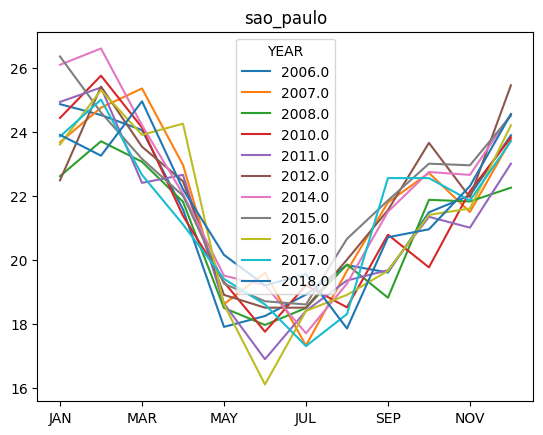

In [12]:
for k in data.keys():
    show_data(k)